In [38]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [39]:
# using the make blobs methods to generate data.

# clusters = [[2,2,2],[7,7,7],[5,13,13]]
clusters = [[2,2,2],[7,7,7],[5,13,13],[1,5,21]]

X,_ = make_blobs(n_samples=300,centers=clusters,cluster_std=0.60)

# quantile
- a quantile determines how many values in a distrubution are above or below a certain limit
    - the median cuts a distribution into two areas and so it is somethimes called 2_quantile
    - Quartiles are also quantiles, they divide the distribution in to four equal parts.

In [40]:
# Bandwidth is found automatically with

bandwidth = estimate_bandwidth(X,quantile=0.2)

In [41]:
# after training the model, we store the coordinates for hte cluster centers

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# mean shift algorithm
ms.fit(X)

clusters_centers = ms.cluster_centers_
labels = ms.labels_

print('clusters_centers\n',clusters_centers)
print('unique labels =',np.unique(labels))

clusters_centers
 [[ 1.92146678  2.02890714  2.06980523]
 [ 4.92126793 12.9337347  12.84743998]
 [ 7.00185167  6.95302182  6.93503342]
 [ 0.87309604  5.06060443 20.87013222]]
unique labels = [0 1 2 3]


In [42]:
label_unique = np.unique(labels)
len(label_unique)

4

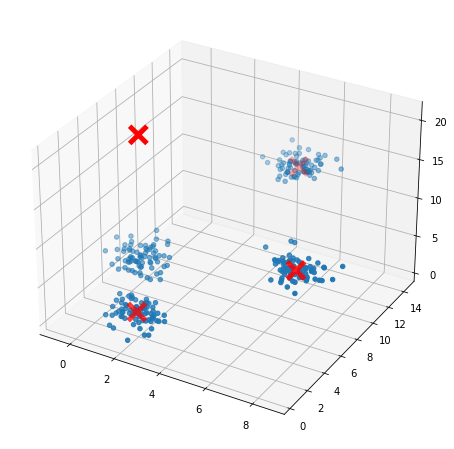

In [43]:
# plot the data points and centroids in a 3D graph.

fig = plt.figure(figsize=(12,8))

ax11 = fig.add_subplot(111,projection='3d')
ax11.scatter(X[:,0],X[:,1],X[:,1],marker = 'o')
ax11.scatter(clusters_centers[:,0],clusters_centers[:,1],clusters_centers[:,2],
            marker='x',color='red',s=300,linewidth = 5, zorder=10)
plt.show()